----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
<h1><center>
    
Practical exam on Computer Vision
 
( November, 8th, 2021 )
</center></h1>    

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


This is the practical exam that should be developed during 2 hours. Note that to approve the exam, both parts (theoretical and practical ones) should be approved. Each exercise is defined with the corresponding score. 

## Exercise 1

### We are the Avengers

When evil stalks the Earth, heroes are more than needed. Sometimes, heroes cannot fight alone, and they need to merge their forces.

In the classic manga Dragon Ball, two characters joined their forces by physically merging them. 

<img src="images/Fusion.gif" width="250" height="25">

In this exercise, we are going to join two of the most important characters in the heroes' wold.

### Ex.1.1) (1.5 point) Extract the low-pass and high-pass images from ``Capitain_America.jpg``. Show the three images with their respective titles.

The result should look like:

<img src="images_notebook/Capitain.png" width="750" height="135">




/home/pau/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(575, 728, 3)


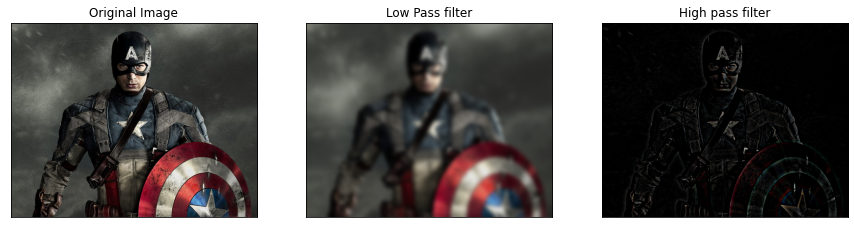

In [1]:
from skimage import io
from matplotlib import pyplot as plt

def visualize3(image1,image2,image3,label1,label2,label3):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,3,1)
    plt.title(label1)
    plt.imshow(image1, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,3,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image2, cmap='gray')
    fig.add_subplot(1,3,3)
    plt.xticks([])
    plt.yticks([])
    plt.title(label3)
    plt.imshow(image3, cmap='gray')


from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform  import rescale
from skimage.filters import gaussian
from skimage import img_as_float

capi = imread('images/Capitain_America.jpg')

capi = img_as_float(capi)
capi_lowpass = gaussian(capi, sigma=6, multichannel=True)
capi_highpass = capi - capi_lowpass

print(capi_highpass.shape)

visualize3(capi, capi_lowpass, capi_highpass, 'Original Image', 'Low Pass filter', 'High pass filter')

### Ex.1.2) (1 point) Similarly to the previous case, extract the low-pass and high-pass images from ``Ironman.jpg``. Show the three images.

The result should look like:

<img src="images_notebook/Ironman.png" width="750" height="135">


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


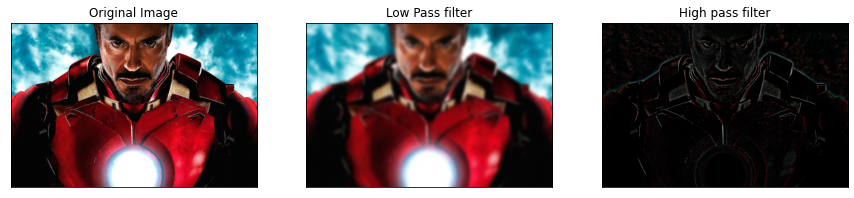

In [2]:
iron = imread('images/Ironman.jpg')

iron = img_as_float(iron)
iron_lowpass = gaussian(iron, sigma=8, multichannel=True)
iron_highpass = iron - iron_lowpass

#canvi

visualize3(iron, iron_lowpass, iron_highpass, 'Original Image', 'Low Pass filter', 'High pass filter')

## Ex.1.3) (2 points) Obtain the hybrid image from the previous filtered images. Note that the two images have a different shape. 

The results should look like:

<img src="images_notebook/Hybrid.png" width="750" height="135">


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


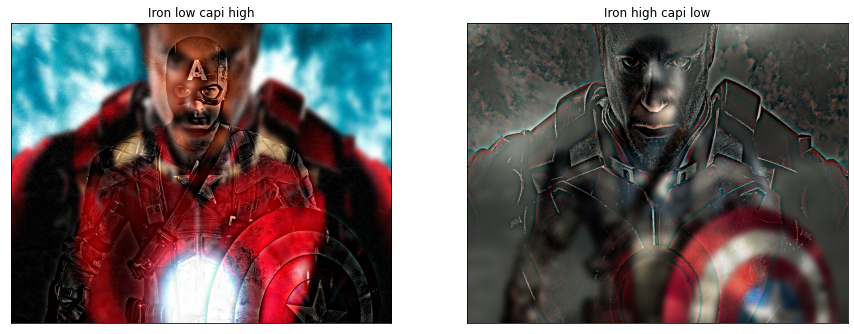

In [3]:
def visualize2(image1, image2, label1,label2):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,2,1)
    plt.title(label1)
    plt.imshow(image1, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,2,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image2, cmap='gray')

from skimage.transform  import resize


#I will convert the ironman to capis shape

reiron_lowpass = resize(iron_lowpass, capi.shape)
reiron_highpass = resize(iron_highpass, capi.shape)


mix = reiron_lowpass + capi_highpass
mix2 = reiron_highpass + capi_lowpass

visualize2(mix, mix2, 'Iron low capi high', 'Iron high capi low')

## Exercise 2

One of the most important things in movies is the color intensity. 

In this exercise we are going to check and manipulate the color intensity of two images: ``dune.jpeg`` and ``dune2.jpg``. 

### Ex 2.1) (1 point) Read the two images and show the RGB histograms with 32 bins.


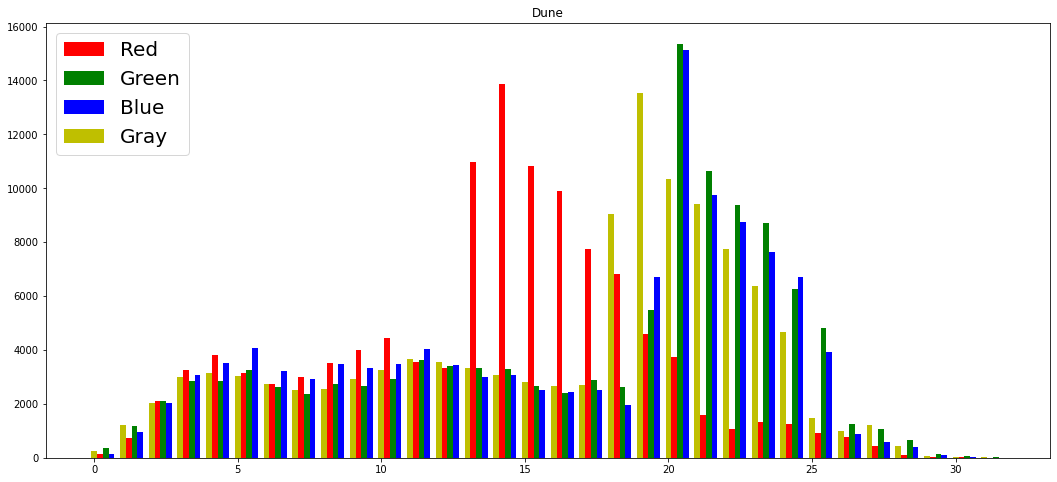

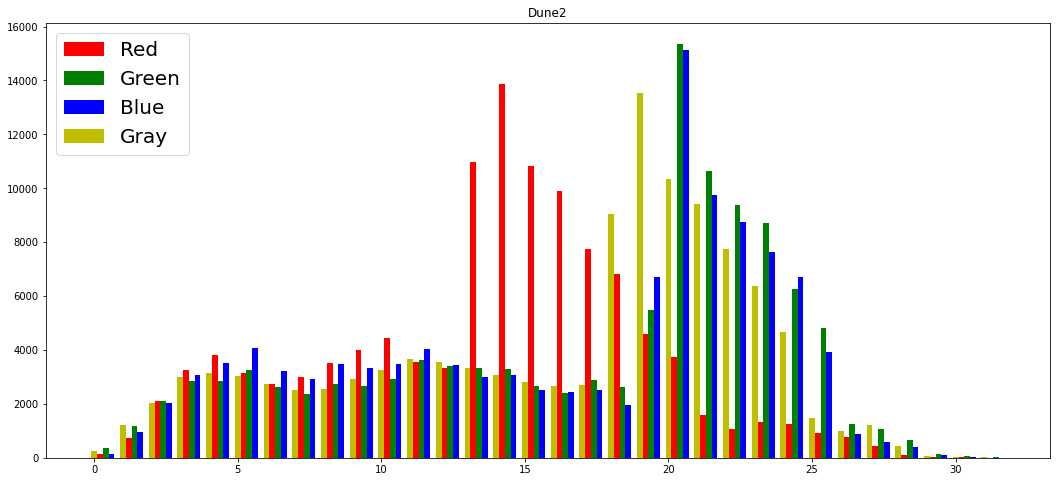

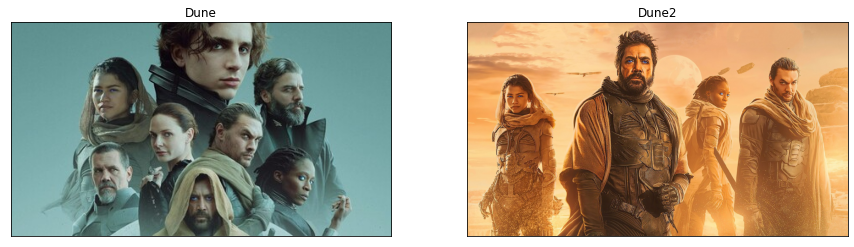

In [5]:
from skimage.exposure import histogram
import numpy as np


def makeHistogram(image, numberOfBins, title):

    if(image.shape[2]==4):
        image_gray=rgb2gray(rgba2rgb(image))
    else:
        image_gray=rgb2gray(image)
    
    hst_r, bins_r = histogram( img_as_float(image[:,:,0]), nbins=numberOfBins)
    hst_g, bins_g = histogram( img_as_float(image[:,:,1]), nbins=numberOfBins)
    hst_b, bins_b = histogram( img_as_float(image[:,:,2]), nbins=numberOfBins)
    hst_gy, bins_gy = histogram( img_as_float(image_gray[:,:]), nbins=numberOfBins)
    
    ind = np.arange(numberOfBins)

    fig = plt.figure(figsize=(18,8))
    cl_gy = plt.bar( ind, hst_gy,0.2, color='y')
    cl_r = plt.bar( ind+.2, hst_r, 0.2, color='r')
    cl_g = plt.bar( ind+.4, hst_g,0.2, color='g')
    cl_b = plt.bar( ind+.6, hst_b,0.2, color='b')
    plt.legend((cl_r[0], cl_g[0], cl_b[0], cl_gy[0]), ('Red','Green','Blue', 'Gray'), loc=2, prop={'size': 20})
    plt.title(title)
    plt.show()



dune = imread('images/dune.jpeg')
dune2 = imread('images/dune2.jpg')

makeHistogram(dune, 32, 'Dune')
makeHistogram(dune, 32, 'Dune2')

visualize2(dune, dune2, 'Dune', 'Dune2')

## Ex.2.2) (1 point) In the two images, interchange channels **Red** and **Blue** and show the results. Visualize their histograms and explain the difference with the previous histograms.

The results of the converted images should look like:

<img src="images_notebook/converted.png" width="750" height="135">

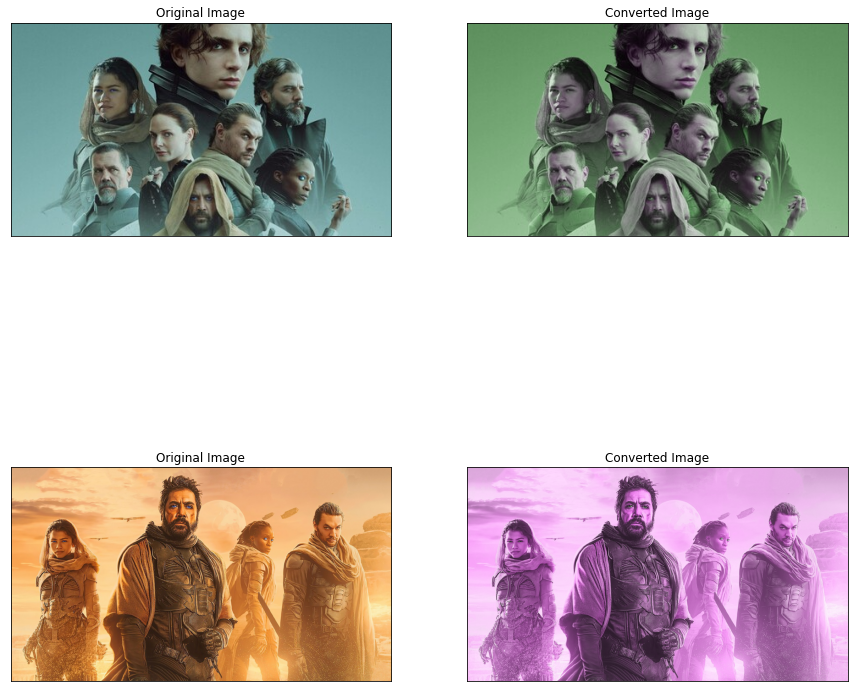

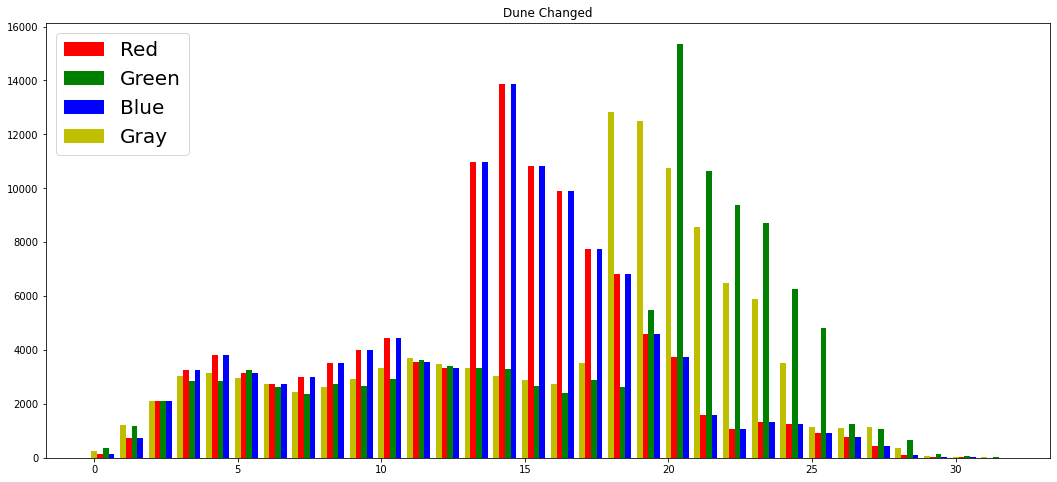

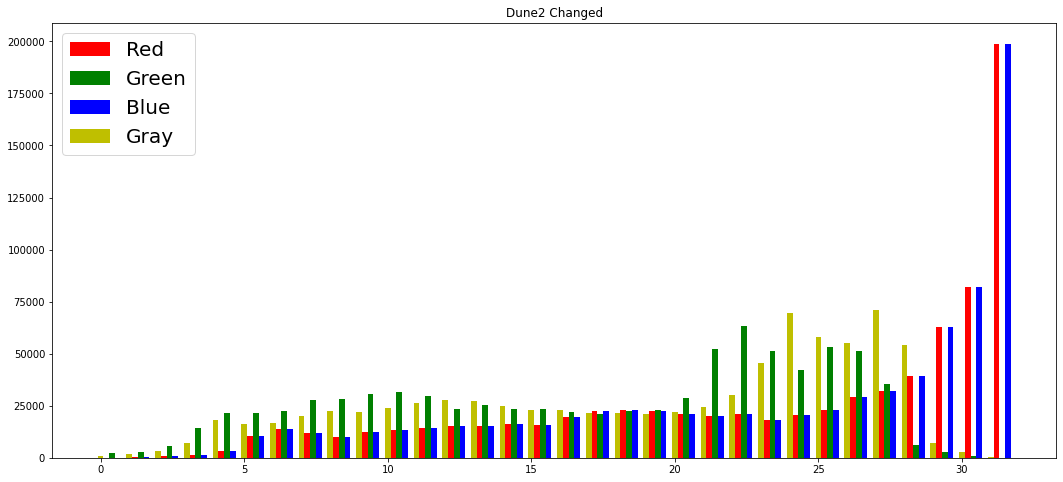

In [8]:
def visualize4(image1,image2,image3,image4,label1,label2,label3,label4):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(2,2,1)
    plt.title(label1)
    plt.imshow(image1, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(2,2,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image2, cmap='gray')
    fig.add_subplot(2,2,3)
    plt.xticks([])
    plt.yticks([])
    plt.title(label3)
    plt.imshow(image3, cmap='gray')
    fig.add_subplot(2,2,4)
    plt.xticks([])
    plt.yticks([])
    plt.title(label4)
    plt.imshow(image4, cmap='gray')

a = dune.copy()
b = dune2.copy()
    
aux = a[:,:,2]
a[:,:,2] = a[:,:,0]
a[:,:,0] = aux

coses = b[:,:,2]
b[:,:,2] = b[:,:,0]
b[:,:,0] = coses

visualize4(dune, a, dune2, b, 'Original Image', 'Converted Image', 'Original Image', 'Converted Image')

makeHistogram(a, 32, 'Dune Changed')
makeHistogram(b, 32, 'Dune2 Changed')

#the changes in the histogram are just changes of where the bars are becase we just intercambiated two channels.
#the blue bars are red, and the red are blue

## Exercise 3

### Let's play Green Light, Red Light

"You have only one oportunity to live..." Or not? 

In the Squid Game, a giant doll presides the Green Ligth, Red Ligth game. When the doll turns her head around, everybody most be still. All those people that are in movement, will be "removed".

Today, we are going to help the doll by removing the background of the images, in order to localize the objects in movement.

<img src="images/doll.jpg" width="400" height="40">

## Ex.3.1) (0.5 points) Load the image collection from  `images\green_light\` and visualize the video

**hint** remember using %matplotlib nbagg

In [9]:
#your solution
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from matplotlib import pyplot as plt, animation as anim

%matplotlib nbagg 

ic = io.ImageCollection('images/green_light/*.jpg')

total_frames = len(ic)

def frame_update(frame_num):
    act_img.set_array(ic[frame_num])
    return act_img

In [ ]:
fig = plt.figure()
act_img = plt.imshow(ic[0], animated = True)
ani = anim.FuncAnimation(fig, frame_update, frames = total_frames, interval = 20, repeat = False)
plt.show()

### Ex.3.2) (1 point) Extract the background of the video

The result of the background image should look similarly to:

<img src="images_notebook/background.png" width="750" height="135">

In [ ]:
icc = img_as_float(ic.concatenate())

print(icc.shape)

background = img_as_float(np.median(icc, axis=0))

io.imshow(background)

### Ex.3.3) (2 points) Extract frame 80 and visualize its foreground image initializing the background to a gray value of 100 intensity

The result of the foreground image should look similarly to:

<img src="images_notebook/foreground.png" width="750" height="135">

In [ ]:
def extract_foreground(picture, threshold, background):
    picture = img_as_float(picture)
    foreground = abs(picture - background)
    foreground = rgb2gray(foreground)
    
    mask_foreground = np.zeros(foreground.shape, dtype='uint8')
    mask_foreground[foreground < threshold] = 0
    mask_foreground[foreground >= threshold] = 1
    
    colour_foreground = picture.copy()
        
    colour_foreground[:,:,0][mask_foreground != 1] = 0
    colour_foreground[:,:,1][mask_foreground != 1] = 0
    colour_foreground[:,:,2][mask_foreground != 1] = 0
    
    return colour_foreground

foreground = extract_foreground(icc[80],0.15, background)

io.imshow(foreground)